## Test d'hypothèse 1.1 : Essayer d'améliorer le contraste des images couleur

Le test `Hypothèse1` a été réalisé pour vérifier s'il est possible de différencier les documents par leurs canaux de couleur. Les documents ont des canaux de couleur différents, cependant, l'histogramme des photos à faible contraste diffère de celles à bon contraste, perturbant leur classement. Dans ce test `Hypothèse1.1`, la possibilité d'améliorer le contraste de ces photos sera vérifiée pour permettre la classification des documents par des canaux de couleur.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
plt.style.use('ggplot')

## Comparaison entre un bon et un mauvais échantillon

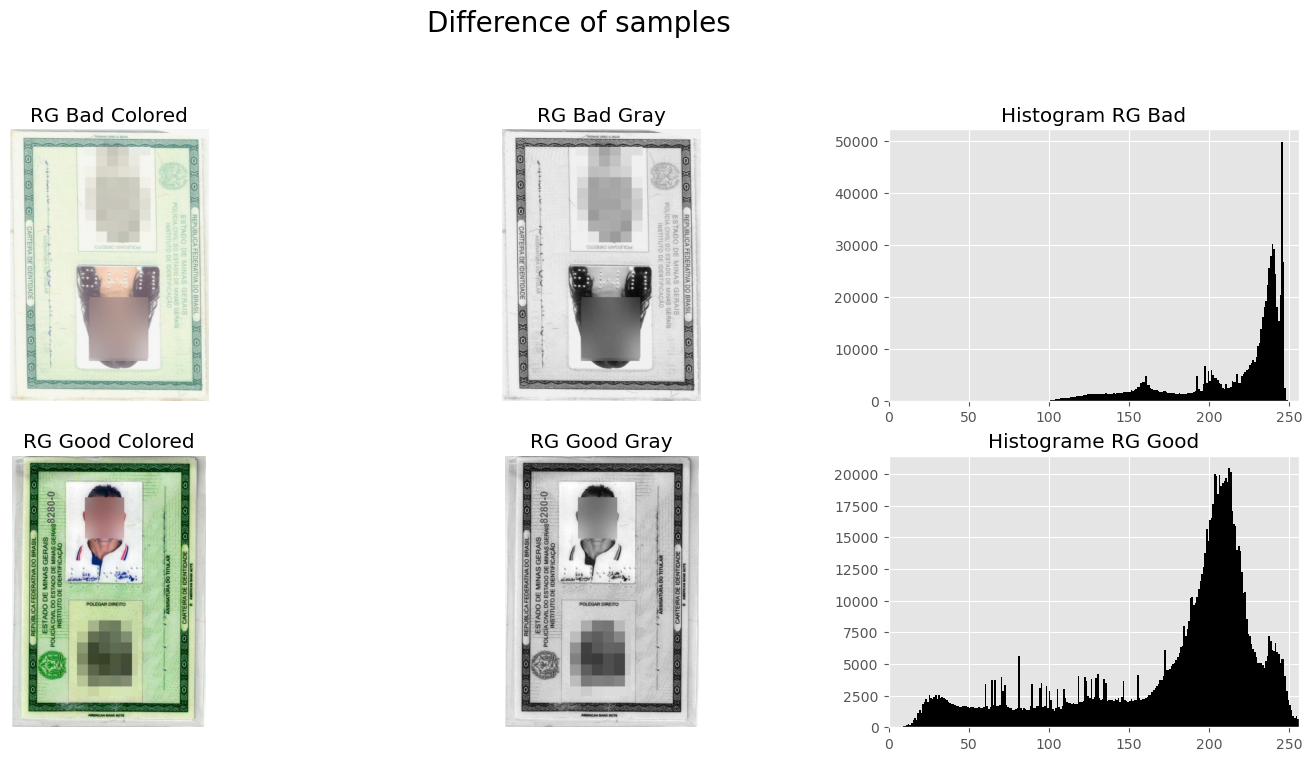

In [6]:
rg_bad = cv2.cvtColor(cv2.imread('BID-Dataset/RG_Recto/00022191_in.jpg'), cv2.COLOR_BGR2RGB)
rg_bad_gray = cv2.cvtColor(rg_bad, cv2.COLOR_RGB2GRAY)

rg_good = cv2.cvtColor(cv2.imread('BID-Dataset/RG_Recto/00022188_in.jpg'), cv2.COLOR_BGR2RGB)
rg_good_gray = cv2.cvtColor(rg_good, cv2.COLOR_RGB2GRAY)


fig = plt.figure(figsize=(18,12))

fig.add_subplot(3,3,1); plt.axis('off')
plt.title('RG Bad Colored')
plt.imshow(rg_bad)

fig.add_subplot(3,3,2); plt.axis('off')
plt.title('RG Bad Gray')
plt.imshow(rg_bad_gray, cmap='gray')

fig.add_subplot(3,3,3)
plt.hist(rg_bad_gray.flatten(),256,[0,256], color = 'black')
plt.title('Histogram RG Bad')
plt.xlim([0,256])

fig.add_subplot(3,3,4); plt.axis('off')
plt.title('RG Good Colored')
plt.imshow(rg_good)

fig.add_subplot(3,3,5); plt.axis('off')
plt.title('RG Good Gray')
plt.imshow(rg_good_gray, cmap='gray')

fig.add_subplot(3,3,6)
plt.hist(rg_good_gray.flatten(),256,[0,256], color = 'black')
plt.title('Histograme RG Good')
plt.xlim([0,256])

fig.suptitle('Difference of samples', fontsize=20)
plt.show();

## Mise à niveau Global

In [11]:
help(cv2.equalizeHist)

Help on built-in function equalizeHist:

equalizeHist(...)
    equalizeHist(src[, dst]) -> dst
    .   @brief Equalizes the histogram of a grayscale image.
    .   
    .   The function equalizes the histogram of the input image using the following algorithm:
    .   
    .   - Calculate the histogram \f$H\f$ for src .
    .   - Normalize the histogram so that the sum of histogram bins is 255.
    .   - Compute the integral of the histogram:
    .   \f[H'_i =  \sum _{0  \le j < i} H(j)\f]
    .   - Transform the image using \f$H'\f$ as a look-up table: \f$\texttt{dst}(x,y) = H'(\texttt{src}(x,y))\f$
    .   
    .   The algorithm normalizes the brightness and increases the contrast of the image.
    .   
    .   @param src Source 8-bit single channel image.
    .   @param dst Destination image of the same size and type as src .



In [5]:
def histogram_equalize(img):
    r, g, b = cv2.split(img)
    red = cv2.equalizeHist(r)
    green = cv2.equalizeHist(g)
    blue = cv2.equalizeHist(b)
    return cv2.merge((red, green, blue))

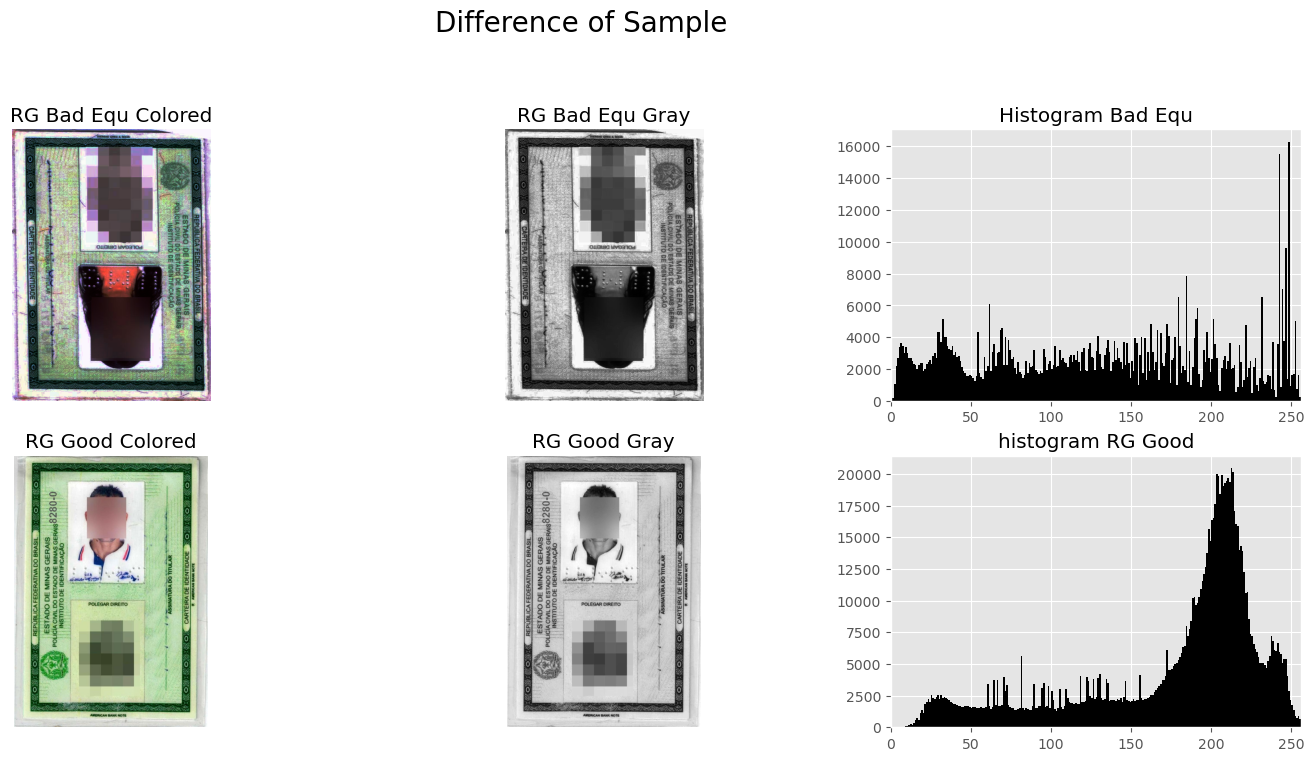

In [7]:
rg_bad_color = histogram_equalize(rg_bad)
rg_bad_equ = cv2.cvtColor(rg_bad_color, cv2.COLOR_RGB2GRAY)

fig = plt.figure(figsize=(18,12))

fig.add_subplot(3,3,1); plt.axis('off')
plt.title('RG Bad Equ Colored')
plt.imshow(rg_bad_color)

fig.add_subplot(3,3,2); plt.axis('off')
plt.title('RG Bad Equ Gray')
plt.imshow(rg_bad_equ, cmap='gray')

fig.add_subplot(3,3,3)
plt.hist(rg_bad_equ.flatten(),256,[0,256], color = 'black')
plt.title('Histogram Bad Equ')
plt.xlim([0,256])

fig.add_subplot(3,3,4); plt.axis('off')
plt.title('RG Good Colored')
plt.imshow(rg_good)

fig.add_subplot(3,3,5); plt.axis('off')
plt.title('RG Good Gray')
plt.imshow(rg_good_gray, cmap='gray')

fig.add_subplot(3,3,6)
plt.hist(rg_good_gray.flatten(),256,[0,256], color = 'black')
plt.title('histogram RG Good')
plt.xlim([0,256])

fig.suptitle('Difference of Sample', fontsize=20)
plt.show();

In [8]:
documents = {
    'rg_bad' : {'matrice' : rg_bad},
    'rg_bad_equ': {'matrice' : rg_bad_color},
    'rg_good' : {'matrice' : rg_good}
}

In [9]:
for key, value in documents.items():
    documents[key]['hist_red'] = cv2.calcHist(documents[key]['matrice'],[0],None,[256],[0,256])
    documents[key]['hist_green'] = cv2.calcHist(documents[key]['matrice'],[1],None,[256],[0,256])
    documents[key]['hist_blue'] = cv2.calcHist(documents[key]['matrice'],[2],None,[256],[0,256])

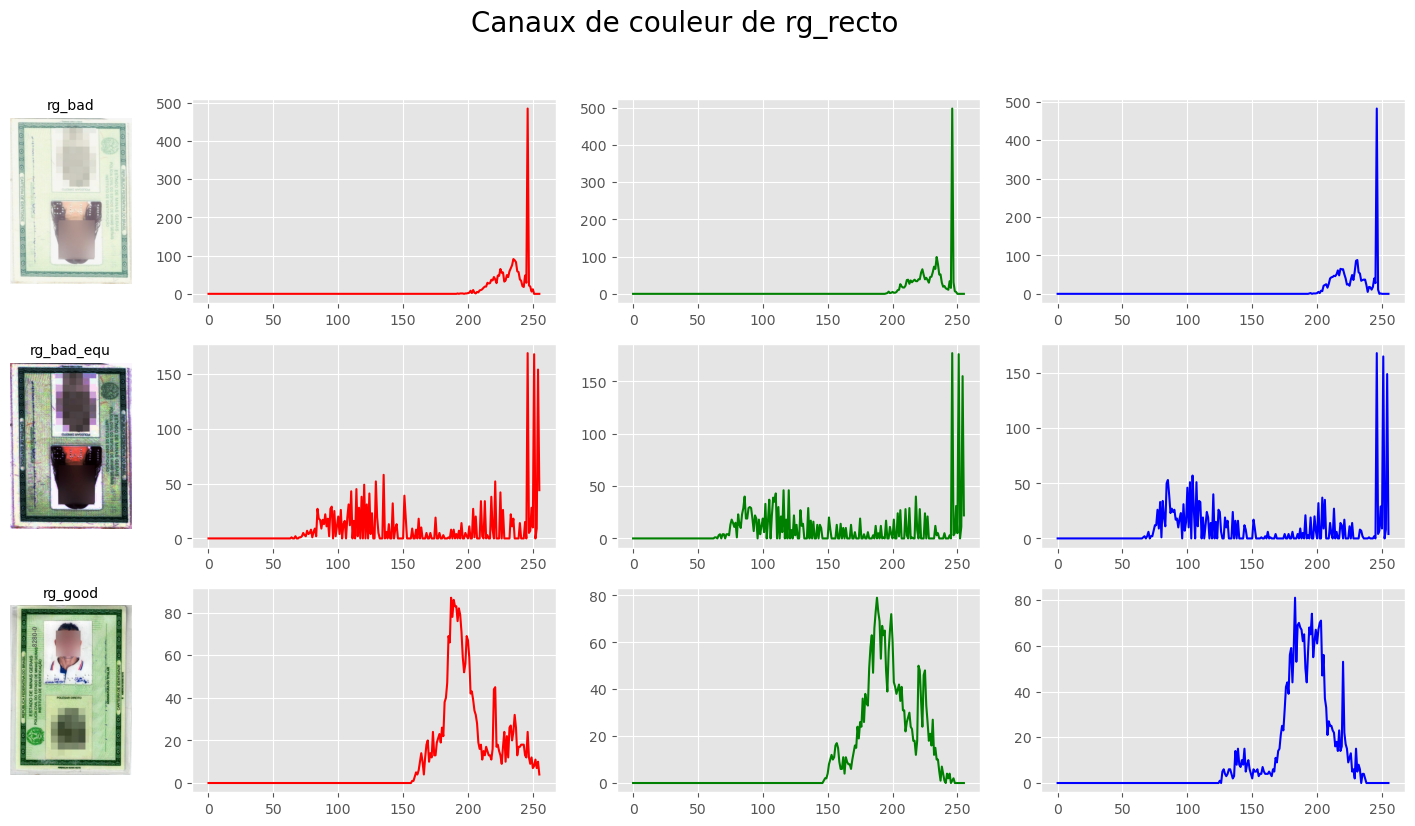

In [10]:
n = len(documents.keys())
fig , ax = plt.subplots(n, 4, figsize=(18,3*n), gridspec_kw={'width_ratios': [1,3,3,3]})

cont = 0
ax.flatten()
ax = ax.T.flatten()
for key, value in documents.items():
    ax[0+(cont)].imshow(value['matrice']); 
    ax[0+(cont)].axis('off'); ax[0+(cont)].set_title(key,fontsize=10)

    ax[n+(cont)].plot(value['hist_red'], color='red');
    ax[n*2+(cont)].plot(value['hist_green'], color='green')
    ax[n*3+(cont)].plot(value['hist_blue'], color='blue')
    cont+=1
    
fig.suptitle('Canaux de couleur de rg_recto', fontsize=20)
plt.show()

## CLAHE (Contrast Limited Adaptive Histogram Equalization)

In [12]:
def clahe_func(img):
    r, g, b = cv2.split(img)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    red = clahe.apply(r)
    green = clahe.apply(g)
    blue = clahe.apply(b)
    return cv2.merge((red, green, blue))

In [17]:
help(cv2.createCLAHE)

Help on built-in function createCLAHE:

createCLAHE(...)
    createCLAHE([, clipLimit[, tileGridSize]]) -> retval
    .   @brief Creates a smart pointer to a cv::CLAHE class and initializes it.
    .   
    .   @param clipLimit Threshold for contrast limiting.
    .   @param tileGridSize Size of grid for histogram equalization. Input image will be divided into
    .   equally sized rectangular tiles. tileGridSize defines the number of tiles in row and column.



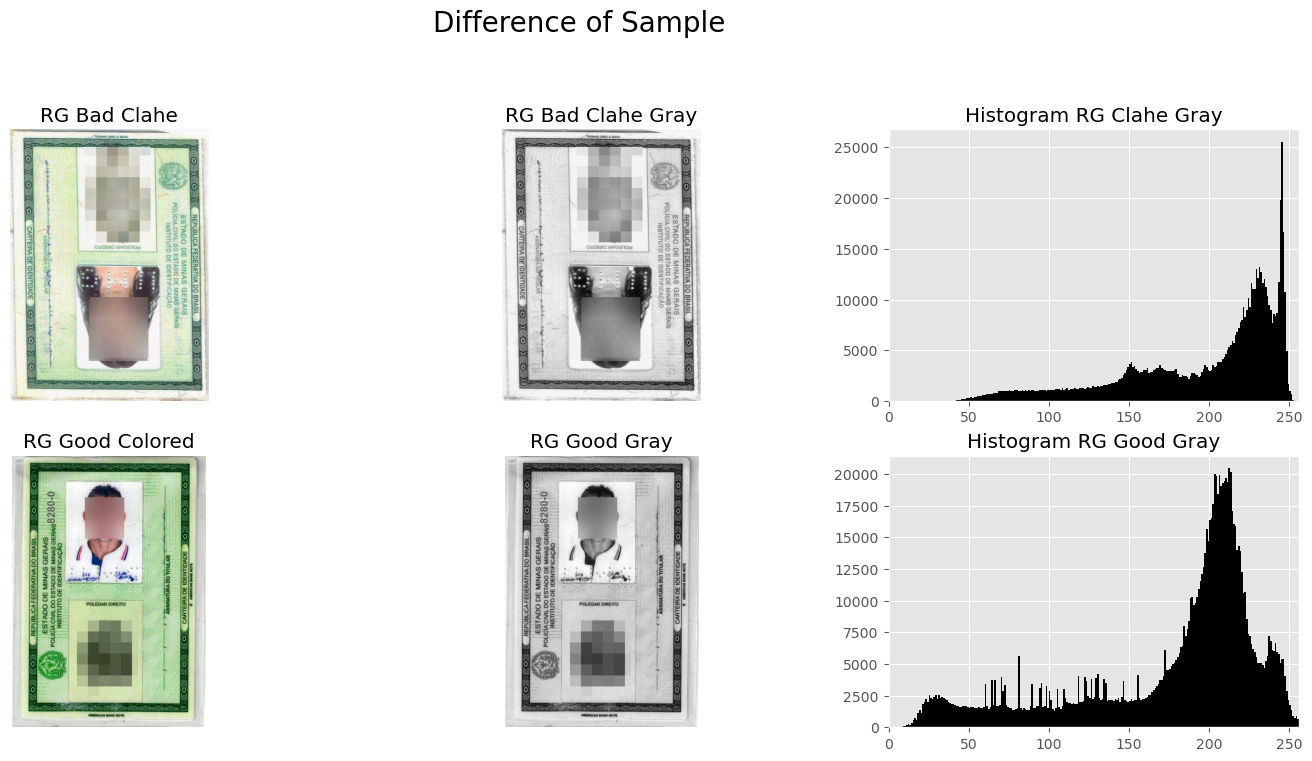

In [13]:
rg_bad_clahe = clahe_func(rg_bad)
rg_clahe_gray = cv2.cvtColor(rg_bad_clahe, cv2.COLOR_RGB2GRAY)

fig = plt.figure(figsize=(18,12))

fig.add_subplot(3,3,1); plt.axis('off')
plt.title('RG Bad Clahe')
plt.imshow(rg_bad_clahe)

fig.add_subplot(3,3,2); plt.axis('off')
plt.title('RG Bad Clahe Gray')
plt.imshow(rg_clahe_gray, cmap='gray')

fig.add_subplot(3,3,3)
plt.hist(rg_clahe_gray.flatten(),256,[0,256], color = 'black')
plt.title('Histogram RG Clahe Gray')
plt.xlim([0,256])

fig.add_subplot(3,3,4); plt.axis('off')
plt.title('RG Good Colored')
plt.imshow(rg_good)

fig.add_subplot(3,3,5); plt.axis('off')
plt.title('RG Good Gray')
plt.imshow(rg_good_gray, cmap='gray')

fig.add_subplot(3,3,6)
plt.hist(rg_good_gray.flatten(),256,[0,256], color = 'black')
plt.title('Histogram RG Good Gray')
plt.xlim([0,256])

fig.suptitle('Difference of Sample', fontsize=20)
plt.show();

In [14]:
documents = {
    'rg_bad' : {'matrice' : rg_bad},
    'rg_bad_clahe': {'matrice' : rg_bad_clahe},
    'rg_good' : {'matrice' : rg_good}
}

In [15]:
for key, value in documents.items():
    documents[key]['hist_red'] = cv2.calcHist(documents[key]['matrice'],[0],None,[256],[0,256])
    documents[key]['hist_green'] = cv2.calcHist(documents[key]['matrice'],[1],None,[256],[0,256])
    documents[key]['hist_blue'] = cv2.calcHist(documents[key]['matrice'],[2],None,[256],[0,256])

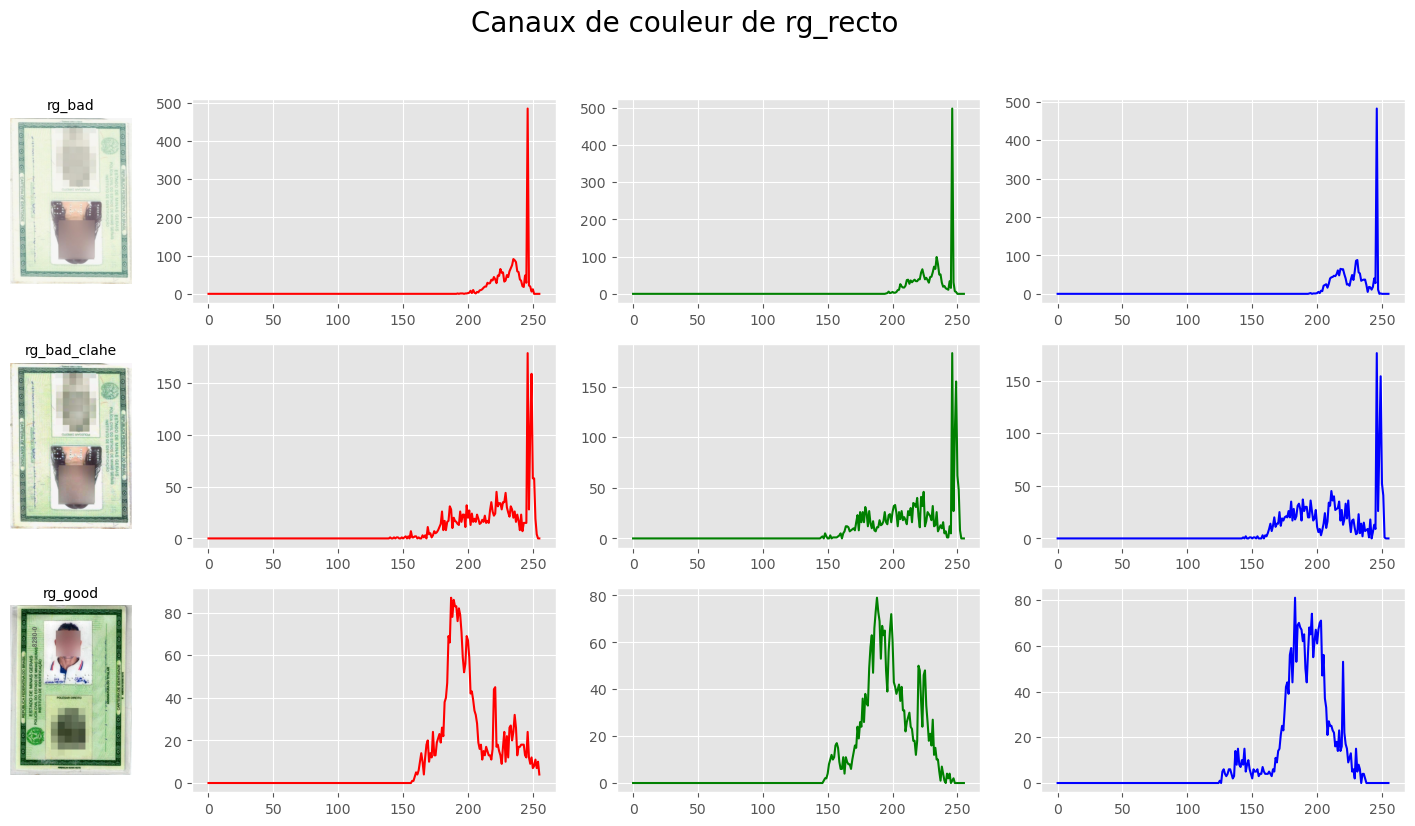

In [16]:
n = len(documents.keys())
fig , ax = plt.subplots(n, 4, figsize=(18,3*n), gridspec_kw={'width_ratios': [1,3,3,3]})

cont = 0
ax.flatten()
ax = ax.T.flatten()
for key, value in documents.items():
    ax[0+(cont)].imshow(value['matrice']); 
    ax[0+(cont)].axis('off'); ax[0+(cont)].set_title(key,fontsize=10)

    ax[n+(cont)].plot(value['hist_red'], color='red');
    ax[n*2+(cont)].plot(value['hist_green'], color='green')
    ax[n*3+(cont)].plot(value['hist_blue'], color='blue')
    cont+=1
    
fig.suptitle('Canaux de couleur de rg_recto', fontsize=20)
plt.show()

## Conclusion

Dans ce test, nous avons vérifié les résultats de deux techniques d'égalisation d'histogramme : l'égalisation globale et l'égalisation CLAHE. L'égalisation globale a fini par altérer la coloration normale du document en raison d'une répartition plus uniforme des histogrammes de chaque canal de couleur. L'égalisation CLAHE, d'autre part, en raison de l'égalisation "plus locale" dans les parties de l'histogramme, a conservé l'aspect de la forme originale de l'histogramme avec une distribution plus uniforme, offrant ainsi un meilleur résultat dans l'égalisation des canaux et par conséquent dans l'amélioration du contraste de l'image.